# Predicting Prices of Used Cars Using Machine Learning

###### Muhammad Raees
G01297465

In [962]:

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [963]:
# uploading data
df = pd.read_csv("CDS492/Data/used_cars_data.csv")

In [964]:
# checking dimensions of dataset
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 7253
Number of columns: 14


In [965]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [966]:
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [967]:
#converting price from rupees to dollars
df['Price'] = df['Price'].apply(lambda x: x*100000)
df['Price'] = df['Price'].div(83)
df['Kilometers_Driven'] = df['Kilometers_Driven'].div(1000)
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72.00,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,2108.433735
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41.00,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,15060.240964
2,2,Honda Jazz V,Chennai,2011,46.00,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,5421.686747
3,3,Maruti Ertiga VDI,Chennai,2012,87.00,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,7228.915663
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40.67,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,21373.493976


In [960]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

### Extracting numerical values from mileage

In [961]:
fuel_economy = []
fuel_economy_unit = []

for n in df["Mileage"]:
    if isinstance(n, str):
        if (
            n.split(" ")[0]
            .replace(".", "", 1)
            .isdigit()  # First element should be numeric
            and " " in n  # Space between numeric and unit
            and (
                n.split(" ")[1] == "kmpl"  # Units are limited to "kmpl" and "km/kg"
                or n.split(" ")[1] == "km/kg"
            )
        ):
            fuel_economy.append(float(n.split(" ")[0]))
            fuel_economy_unit.append(n.split(" ")[1])
        else:
            print(
                "missing value",
                n,
            )
    else:
        fuel_economy.append(np.nan)
        fuel_economy_unit.append(np.nan)

In [920]:
df["fuel_economy"] = fuel_economy
df["fuel_economy_unit"] = fuel_economy_unit

df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,fuel_economy,fuel_economy_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72.00,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,2108.433735,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41.00,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,15060.240964,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46.00,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,5421.686747,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87.00,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,7228.915663,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40.67,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,21373.493976,15.20,kmpl


### Extracting numerical value from engine

In [921]:

# Create a new column after splitting the engine values.
engine_num = []

# Regex for numeric + " " + "CC"  format
regex_engine = "^\d+(\.\d+)? CC$"

for n in df["Engine"]:
    if isinstance(n, str):
        if re.match(regex_engine, n):
            engine_num.append(float(n.split(" ")[0]))
        else:
            print(
                "missing value",
                n,
            )
    else:
        # If there are any missing values in the engine column, we add missing values to the new column
        engine_num.append(np.nan)

In [922]:

df["engine_num"] = engine_num
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,fuel_economy,fuel_economy_unit,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72.00,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,2108.433735,26.60,km/kg,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41.00,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,15060.240964,19.67,kmpl,1582.0
2,2,Honda Jazz V,Chennai,2011,46.00,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,5421.686747,18.20,kmpl,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87.00,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,7228.915663,20.77,kmpl,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40.67,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,21373.493976,15.20,kmpl,1968.0


### Extracting numerical value from Power

In [923]:

power_num = [] #creating a new column

# Regex for numeric + " " + "bhp"  format
regex_power = "^\d+(\.\d+)? bhp$"

for n in df["Power"]:
    if isinstance(n, str):
        if re.match(regex_power, n):
            power_num.append(float(n.split(" ")[0]))
        else:
            print(
                "missing value",
                n,
            )
    else:
        # If there are any missing values in the power column, we add missing values to the new column
        power_num.append(np.nan)

missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing value null bhp
missing val

In [924]:
power_num = []

for n in df["Power"]:
    if isinstance(n, str):
        if re.match(regex_power, n):
            power_num.append(float(n.split(" ")[0]))
        else:
            power_num.append(np.nan)
    else:
        # If there are any missing values in the power column, we add missing values to the new column
        power_num.append(np.nan)


df["power_num"] = power_num

df.head(10) 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,fuel_economy,fuel_economy_unit,engine_num,power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72.000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,2108.433735,26.60,km/kg,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41.000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,15060.240964,19.67,kmpl,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46.000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,5421.686747,18.20,kmpl,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87.000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,7228.915663,20.77,kmpl,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40.670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,21373.493976,15.20,kmpl,1968.0,140.80
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75.000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2831.325301,21.10,km/kg,814.0,55.20
6,6,Nissan Micra Diesel XV,Jaipur,2013,86.999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,4216.867470,23.08,kmpl,1461.0,63.10
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36.000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,21084.337349,11.36,kmpl,2755.0,171.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64.430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,6265.060241,20.54,kmpl,1598.0,103.60
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65.932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,2349.397590,22.30,kmpl,1248.0,74.00


### Extracting numerical value from New price

In [925]:

new_price_num = [] # Creating a new column for New_Price values.

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for n in df["New_Price"]:
    if isinstance(n, str):
        if re.match(regex_power, n):
            new_price_num.append(float(n.split(" ")[0]))
        else:
            print(
                "Not processed. All values are not similar ",
                n,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

Not processed. All values are not similar  1.28 Cr
Not processed. All values are not similar  1.04 Cr
Not processed. All values are not similar  1 Cr
Not processed. All values are not similar  1.04 Cr
Not processed. All values are not similar  1.39 Cr
Not processed. All values are not similar  1.02 Cr
Not processed. All values are not similar  1.4 Cr
Not processed. All values are not similar  1.06 Cr
Not processed. All values are not similar  1.27 Cr
Not processed. All values are not similar  1.13 Cr
Not processed. All values are not similar  1.36 Cr
Not processed. All values are not similar  1.66 Cr
Not processed. All values are not similar  1.6 Cr
Not processed. All values are not similar  1.28 Cr
Not processed. All values are not similar  2.3 Cr
Not processed. All values are not similar  1.71 Cr
Not processed. All values are not similar  1.39 Cr
Not processed. All values are not similar  1.58 Cr
Not processed. All values are not similar  3.75 Cr
Not processed. All values are not sim

In [926]:
new_price_num = [] #creating new column for new_price

for n in df["New_Price"]:
    if isinstance(n, str):
        if re.match(regex_power, n):
            new_price_num.append(float(n.split(" ")[0]))
        else:
            new_price_num.append(float(n.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# adding the new column to the data
df["new_price_num"] = new_price_num
df.head(5) 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,fuel_economy,fuel_economy_unit,engine_num,power_num,new_price_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72.00,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,2108.433735,26.60,km/kg,998.0,58.16,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41.00,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,15060.240964,19.67,kmpl,1582.0,126.20,NaN
2,2,Honda Jazz V,Chennai,2011,46.00,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,5421.686747,18.20,kmpl,1199.0,88.70,8.61
3,3,Maruti Ertiga VDI,Chennai,2012,87.00,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,7228.915663,20.77,kmpl,1248.0,88.76,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40.67,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,21373.493976,15.20,kmpl,1968.0,140.80,NaN


In [927]:
#droping "Mileage", "mileage_unit", "Engine", "Power", "New_Price" since they are not needed anymore.
df.drop(columns=["Mileage", "fuel_economy_unit", "Engine", "Power", "New_Price"], inplace = True)

In [928]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price,fuel_economy,engine_num,power_num,new_price_num
count,7253.000000,7253.000000,7253.000000,7200.000000,6019.000000,7251.000000,7207.000000,7078.000000,1006.000000
mean,3626.000000,2013.365366,58.699063,5.279722,11421.046205,18.141580,1616.573470,112.765214,22.779692
std,2093.905084,3.254421,84.427721,0.811660,13479.418208,4.562197,595.285137,53.493553,27.759344
min,0.000000,1996.000000,0.171000,0.000000,530.120482,0.000000,72.000000,34.200000,3.910000
25%,1813.000000,2011.000000,34.000000,5.000000,4216.867470,15.170000,1198.000000,75.000000,7.885000
50%,3626.000000,2014.000000,53.416000,5.000000,6795.180723,18.160000,1493.000000,94.000000,11.570000
75%,5439.000000,2016.000000,73.000000,5.000000,11987.951807,21.100000,1968.000000,138.100000,26.042500
max,7252.000000,2019.000000,6500.000000,10.000000,192771.084337,33.540000,5998.000000,616.000000,375.000000


In [929]:
df[df['Kilometers_Driven'] == 6500 ] # finding outlier for kilometer_Driven

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,fuel_economy,engine_num,power_num,new_price_num
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500.0,Diesel,Automatic,First,5.0,78313.253012,15.97,2993.0,258.0,NaN


In [930]:
df = df.drop(df[df['Kilometers_Driven'] == 6500].index) #dropping outlier

/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of Price ')]

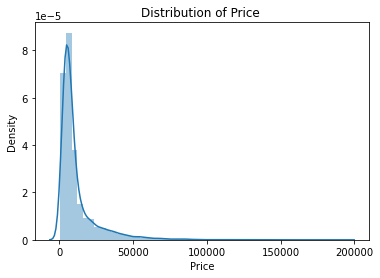

In [931]:
#checking price distribution
sns.distplot(df["Price"]).set(
    title="Distribution of Price ") 

Price has right skewed distribution

In [932]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
Price                1234
fuel_economy            2
engine_num             46
power_num             175
new_price_num        6246
dtype: int64

In [933]:
df[df['fuel_economy'].isnull()] # finding null values in fuel_type

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,fuel_economy,engine_num,power_num,new_price_num
4446,4446,Mahindra E Verito D4,Chennai,2016,50.0,Electric,Automatic,First,5.0,15662.650602,NaN,72.0,41.0,13.58
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44.0,Electric,Automatic,First,5.0,15361.445783,NaN,1798.0,73.0,NaN


There are only two cars in the dataset that are electric so its better to drop them.

In [934]:
df = df.drop(df[df['Fuel_Type'] == 'Electric'].index)

In [935]:
df['fuel_economy'].replace(0, np.nan, inplace=True) #replacing 0 values with null so they can be imputed later

In [936]:
df['fuel_economy'].isnull().sum()

81

[Text(0.5, 1.0, 'Boxplot of Price and Fuel Type'),
 Text(0, 0.5, 'Price (dollars)')]

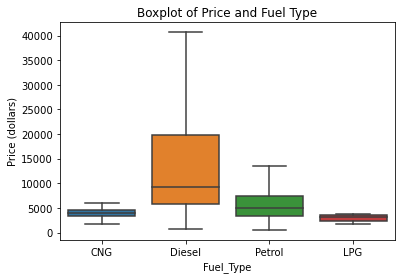

In [937]:
sns.boxplot(x = df['Fuel_Type'], y = df['Price'], showfliers = False,
           ).set(title="Boxplot of Price and Fuel Type", ylabel = 'Price (dollars)')

In [938]:
df.loc[df["engine_num"] == 5998] #accroding to the stats table 5998 was too high for engine.

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,fuel_economy,engine_num,power_num,new_price_num
5521,5521,Bentley Continental Flying Spur,Hyderabad,2006,48.0,Petrol,Automatic,First,4.0,71084.337349,8.6,5998.0,552.0,NaN
6354,6354,Bentley Flying Spur W12,Bangalore,2008,31.2,Petrol,Automatic,Second,5.0,NaN,10.2,5998.0,616.0,375.0


5998 is not an outlier since bentley is luxury car an it has a high powered engine

In [939]:
df.sort_values(by = ["Seats"], ascending = True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,fuel_economy,engine_num,power_num,new_price_num
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125.000,Petrol,Automatic,First,0.0,21686.746988,10.50,3197.0,NaN,NaN
2095,2095,Mercedes-Benz SLC 43 AMG,Coimbatore,2019,2.526,Petrol,Automatic,First,2.0,101156.626506,19.00,2996.0,362.07,106.0
557,557,Audi TT 2.0 TFSI,Delhi,2013,12.100,Petrol,Automatic,First,2.0,35542.168675,9.90,1984.0,207.80,NaN
4691,4691,Mercedes-Benz SLK-Class 55 AMG,Bangalore,2014,3.000,Petrol,Automatic,Second,2.0,108433.734940,12.00,5461.0,421.00,NaN
4722,4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35.000,Petrol,Automatic,First,2.0,35542.168675,8.10,5461.0,387.30,NaN
926,926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10.000,Petrol,Manual,First,2.0,48192.771084,9.00,3436.0,NaN,NaN
5919,5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8.000,Petrol,Automatic,First,2.0,120481.927711,12.50,5000.0,488.10,NaN
915,915,Smart Fortwo CDI AT,Pune,2008,103.000,Diesel,Automatic,Second,2.0,3614.457831,NaN,799.0,NaN,NaN
6960,6960,Mercedes-Benz SLC 43 AMG,Coimbatore,2018,18.338,Petrol,Automatic,First,2.0,NaN,19.00,2996.0,362.07,106.0
4893,4893,BMW Z4 2009-2013 Roadster 2.5i,Kochi,2018,9.952,Petrol,Automatic,First,2.0,70530.120482,10.37,2979.0,306.00,NaN


In [940]:
df['Seats'].replace(0, np.nan, inplace=True) #replacing 0 values with null so they can be imputed later

[Text(0.5, 1.0, 'Boxplot of Price and Transmission'),
 Text(0, 0.5, 'Price (dollars)')]

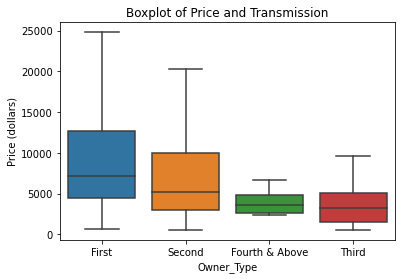

In [941]:
sns.boxplot(x = df['Owner_Type'], y = df['Price'], showfliers = False,
           ).set(title="Boxplot of Price and Transmission", ylabel = 'Price (dollars)')

In [942]:
df[df['Owner_Type'] == 'Fourth & Above' ]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,fuel_economy,engine_num,power_num,new_price_num
29,29,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2007,262.000,Diesel,Manual,Fourth & Above,7.0,4819.277108,12.8,2494.0,102.00,NaN
885,885,Maruti Grand Vitara AT,Chennai,2008,77.000,Petrol,Automatic,Fourth & Above,5.0,6626.506024,9.7,1995.0,163.50,NaN
1081,1081,Hyundai i20 1.2 Sportz Option,Bangalore,2010,61.000,Petrol,Manual,Fourth & Above,5.0,3915.662651,17.0,1197.0,80.00,NaN
1699,1699,Ford Endeavour 4x2 XLT Limited Edition,Pune,2007,90.000,Diesel,Manual,Fourth & Above,7.0,3614.457831,10.9,2499.0,143.00,NaN
2988,2988,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,2005,240.000,Diesel,Manual,Fourth & Above,8.0,6144.578313,12.8,2494.0,102.00,NaN
3368,3368,Maruti Swift Ldi BSIII,Pune,2009,80.000,Diesel,Manual,Fourth & Above,5.0,2590.361446,17.8,1248.0,75.00,NaN
3404,3404,Maruti Swift 1.3 VXi,Jaipur,2006,125.000,Petrol,Manual,Fourth & Above,NaN,2831.325301,16.1,NaN,NaN,NaN
4148,4148,Ford Ikon 1.3 Flair,Coimbatore,2008,59.833,Petrol,Manual,Fourth & Above,5.0,2373.493976,13.8,1299.0,70.00,NaN
5647,5647,Toyota Qualis Fleet A3,Mumbai,2001,227.000,Diesel,Manual,Fourth & Above,8.0,2650.602410,NaN,2446.0,NaN,NaN
6226,6226,Maruti Omni E 8 Str STD,Bangalore,2005,81.245,Petrol,Manual,Fourth & Above,8.0,NaN,16.8,796.0,34.20,NaN


In [943]:
df = df.drop(df[df['Owner_Type'] == 'Fourth & Above'].index) #there arenot enough data for fourth and above owner type, so removing
                                                             # them is better.

## Feature engineering 

In [944]:
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df["Brand"].value_counts()


maruti           1440
hyundai          1338
honda             743
toyota            503
mercedes-benz     380
volkswagen        374
ford              349
mahindra          330
bmw               311
audi              285
tata              227
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

In [945]:
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())

[Text(0.5, 1.0, 'Brand count')]

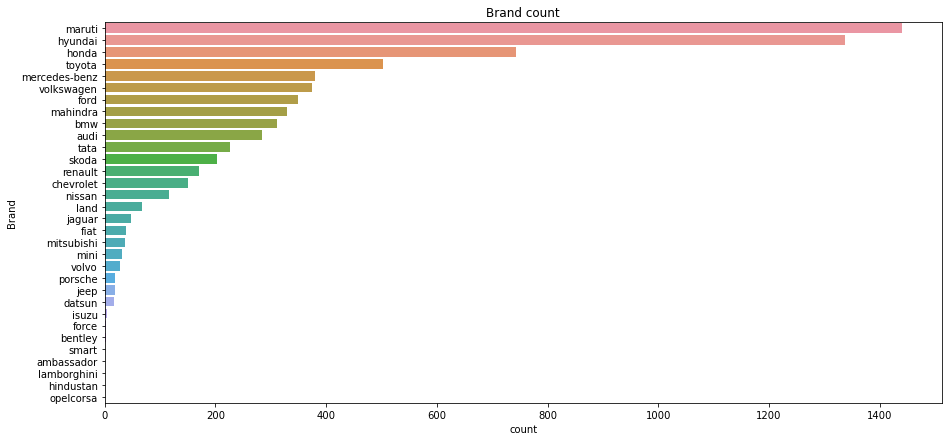

In [946]:
plt.figure(figsize = (15, 7))
sns.countplot(y = "Brand", data = df, order = df["Brand"].value_counts().index).set(
    title="Brand count")

## Imputing missing values

In [947]:
df.isnull().sum()


S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
Price                1231
fuel_economy           79
engine_num             45
power_num             172
new_price_num        6233
Brand                   0
Model                   0
dtype: int64

In [948]:
# filling the null values for seat by taking medians of the particular model of the car.

df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

In [949]:
df[df['Seats'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,fuel_economy,engine_num,power_num,new_price_num,Brand,Model
2369,2369,Maruti Estilo LXI,Chennai,2008,56.0,Petrol,Manual,Second,NaN,1807.228916,19.5,1061.0,NaN,NaN,maruti,estilo
3882,3882,Maruti Estilo LXI,Kolkata,2010,40.0,Petrol,Manual,Second,NaN,3012.048193,19.5,1061.0,NaN,NaN,maruti,estilo
5893,5893,Maruti Estilo LXI,Chennai,2008,51.0,Petrol,Manual,Second,NaN,2108.433735,19.5,1061.0,NaN,NaN,maruti,estilo


The model above doesnt have values for seats in the dataset. So i looked up online for the number of seats for this car. It has 5 seats.

In [950]:
df["Seats"] = df["Seats"].fillna(5.0) 

In [951]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                1231
fuel_economy           79
engine_num             45
power_num             172
new_price_num        6233
Brand                   0
Model                   0
dtype: int64

In [952]:
# Imputed missing values for fuel_economy, engine, power, and new_price by taking medians of the particular model of the car.


df["engine_num"] = df.groupby(["Brand", "Model"])["engine_num"].transform(
    lambda x: x.fillna(x.median())
)
df["power_num"] = df.groupby(["Brand", "Model"])["power_num"].transform(
    lambda x: x.fillna(x.median())
)
df["new_price_num"] = df.groupby(["Brand", "Model"])["new_price_num"].transform(
    lambda x: x.fillna(x.median())
)
df["fuel_economy"] = df.groupby(["Brand", "Model"])["fuel_economy"].transform(
    lambda x: x.fillna(x.median())
)

In [953]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                1231
fuel_economy            7
engine_num              0
power_num              12
new_price_num        1505
Brand                   0
Model                   0
dtype: int64

There are still missing values in fuel_economy, power, new_price_num so dropping them is better

In [835]:
df.dropna(inplace=True,axis=0)

In [836]:
df.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
fuel_economy         0
engine_num           0
power_num            0
new_price_num        0
Brand                0
Model                0
dtype: int64

There are no more missing values for independent variables.

In [837]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price,fuel_economy,engine_num,power_num,new_price_num
count,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000,4764.000000
mean,3022.795130,2013.820949,55.646067,5.276658,11793.026008,18.603184,1615.279597,112.806956,22.393559
std,1739.315039,3.061353,37.169174,0.739027,12620.727068,4.159849,565.102607,49.326163,25.130188
min,0.000000,1998.000000,0.171000,2.000000,783.132530,8.200000,793.000000,38.400000,3.910000
25%,1514.500000,2012.000000,32.276500,5.000000,4819.277108,16.000000,1198.000000,80.000000,7.880000
50%,3028.500000,2014.000000,51.000000,5.000000,7295.180723,18.500000,1497.000000,98.600000,11.685000
75%,4539.250000,2016.000000,70.301750,5.000000,13132.530120,21.500000,1968.000000,140.000000,24.010000
max,6017.000000,2019.000000,775.000000,9.000000,192771.084337,33.540000,4951.000000,550.000000,230.000000


In [838]:
df = df.drop(columns=['S.No.','Name'])  #dropping redundant variables

<AxesSubplot:>

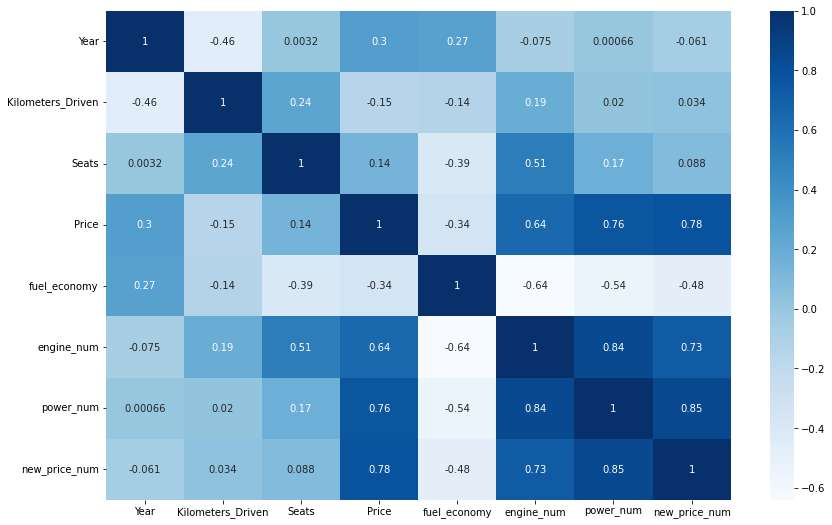

In [839]:

plt.figure(figsize = (14, 9))
sns.heatmap(df.corr(), annot = True, cmap="Blues")

In [840]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
fuel_economy         0
engine_num           0
power_num            0
new_price_num        0
Brand                0
Model                0
dtype: int64

[Text(0.5, 1.0, 'Histogram of Engine'), Text(0.5, 0, 'Engine (cc)')]

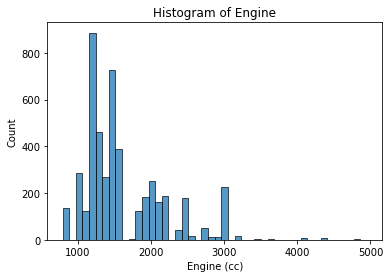

In [841]:
sns.histplot(df["engine_num"]).set(title="Histogram of Engine", xlabel = 'Engine (cc)') #histogram of engine

/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of kilometers driven '),
 Text(0.5, 0, 'kilometers driven in 1000')]

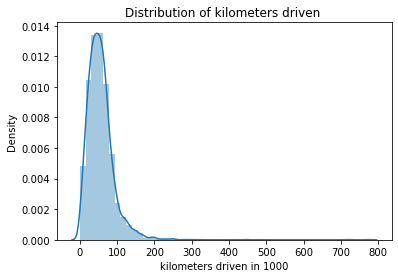

In [842]:
sns.distplot(df["Kilometers_Driven"]).set(
    title="Distribution of kilometers driven ", xlabel = 'kilometers driven in 1000')

[Text(0.5, 1.0, 'Engine vs Price'),
 Text(0, 0.5, 'Price(dollars)'),
 Text(0.5, 0, 'Engine (cc)')]

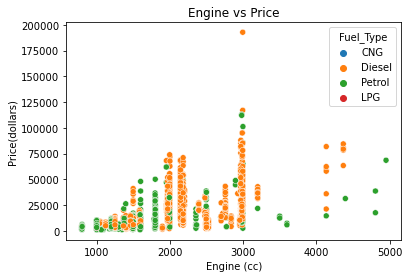

In [843]:
sns.scatterplot(data=df,y='Price',x='engine_num', hue = 'Fuel_Type').set(
    title="Engine vs Price", 
    ylabel = 'Price(dollars)', 
    xlabel = 'Engine (cc)',)

[Text(0.5, 1.0, 'Fuel Economy vs Power'),
 Text(0, 0.5, 'Fuel Economy'),
 Text(0.5, 0, 'Power (bhp)')]

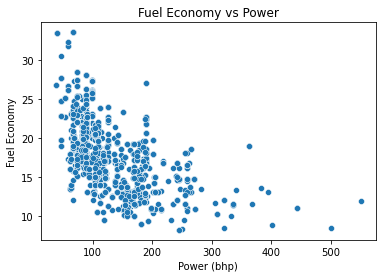

In [844]:
sns.scatterplot(data=df,y='fuel_economy',x='power_num').set(
    title="Fuel Economy vs Power", 
    ylabel = 'Fuel Economy', 
    xlabel = 'Power (bhp)')

[Text(0.5, 1.0, 'Fuel Economy vs Power'),
 Text(0, 0.5, 'Fuel Economy'),
 Text(0.5, 0, 'Enginge (cc)')]

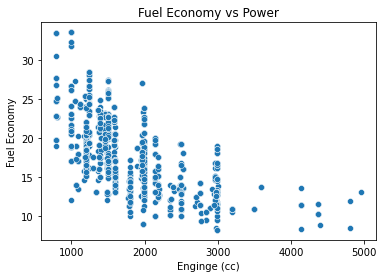

In [845]:
sns.scatterplot(data=df,y='fuel_economy',x='engine_num').set(
    title="Fuel Economy vs Power", 
    ylabel = 'Fuel Economy', 
    xlabel = 'Enginge (cc)')

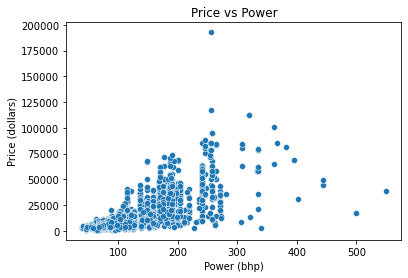

In [846]:

sns.scatterplot(data=df,y='Price',x='power_num').set(
    title="Price vs Power", 
    ylabel = 'Price (dollars)', 
    xlabel = 'Power (bhp)')
plt.show()

[Text(0.5, 1.0, 'Price vs Kilometers driven'),
 Text(0, 0.5, 'Price (dollars)'),
 Text(0.5, 0, 'Kilometers driven (km)')]

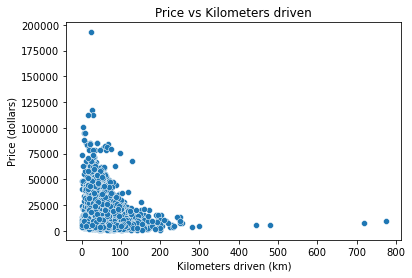

In [847]:

sns.scatterplot(data=df,y='Price',x='Kilometers_Driven').set(
    title="Price vs Kilometers driven", 
    ylabel = 'Price (dollars)', 
    xlabel = 'Kilometers driven (km)')

[Text(0.5, 1.0, 'Boxplot of Price and Location'),
 Text(0, 0.5, 'Price (dollars)')]

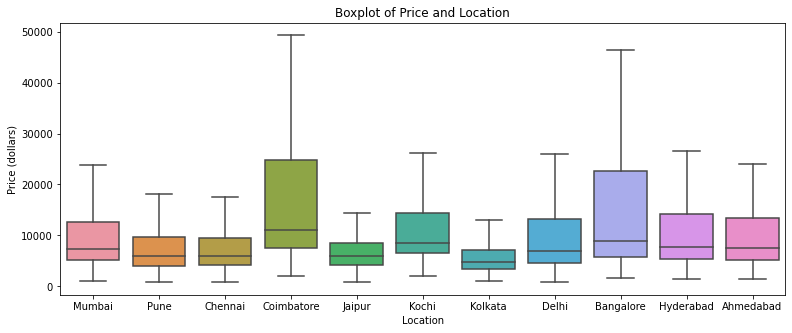

In [848]:
 plt.figure(figsize = (13, 5))
sns.boxplot(x = df['Location'], y = df['Price'], showfliers = False,).set(title="Boxplot of Price and Location", ylabel = 'Price (dollars)')

[Text(0.5, 1.0, 'Boxplot of Price and Transmission'),
 Text(0, 0.5, 'Price (dollars)')]

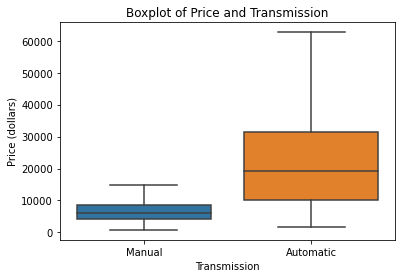

In [849]:

sns.boxplot(x = df['Transmission'], y = df['Price'], showfliers = False,).set(
    title="Boxplot of Price and Transmission", 
    ylabel = 'Price (dollars)')

/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


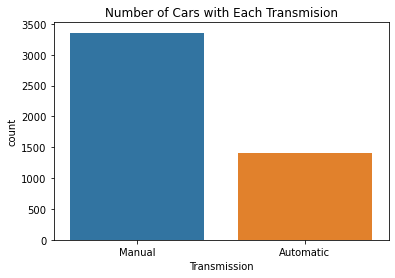

In [850]:
#creating barchart of Transmission
ax = sns.countplot(df['Transmission']).set(title="Number of Cars with Each Transmision") 

[Text(0.5, 1.0, 'Histogram of Price'), Text(0.5, 0, 'Price')]

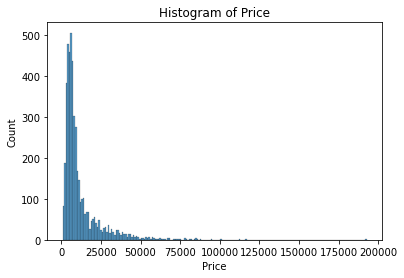

In [851]:
sns.histplot(df["Price"]).set(title="Histogram of Price", xlabel = 'Price') # checking distribution of Price

In [852]:
df["Price_log"] = np.log(df["Price"]) # transforming price to logarithmic scale

[Text(0.5, 1.0, 'Histogram of Price'), Text(0.5, 0, 'Price log')]

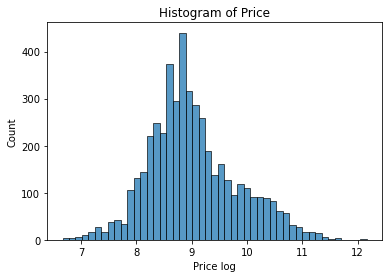

In [853]:
sns.histplot(df["Price_log"]
            ).set(title="Histogram of Price", xlabel = 'Price log') # logarithmic scale has normal distribution

[Text(0.5, 1.0, 'Price vs Year')]

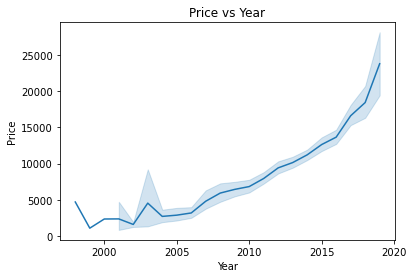

In [854]:
sns.lineplot(x=df['Year'], y=df['Price']).set(title = 'Price vs Year')

In [855]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,fuel_economy,engine_num,power_num,new_price_num,Brand,Model,Price_log
0,Mumbai,2010,72.00,CNG,Manual,First,5.0,2108.433735,26.60,998.0,58.16,5.51,maruti,wagon,7.653701
1,Pune,2015,41.00,Diesel,Manual,First,5.0,15060.240964,19.67,1582.0,126.20,16.06,hyundai,creta,9.619814
2,Chennai,2011,46.00,Petrol,Manual,First,5.0,5421.686747,18.20,1199.0,88.70,8.61,honda,jazz,8.598162
3,Chennai,2012,87.00,Diesel,Manual,First,7.0,7228.915663,20.77,1248.0,88.76,11.27,maruti,ertiga,8.885844
4,Coimbatore,2013,40.67,Diesel,Automatic,Second,5.0,21373.493976,15.20,1968.0,140.80,53.14,audi,a4,9.969907


# Modeling


In [856]:
independent_var = df.drop(["Price","Price_log"], axis = 1)  # assigning explanaotry variables
dependent_var = df[["Price","Price_log"]] # assigning target variable

In [857]:
# creating dummy variables for catagorical variables
def encode(x):
    x = pd.get_dummies(x,columns = x.select_dtypes(include = ["object", "category"]).columns.tolist(),drop_first = True,)
    return x


independent_variable = encode(independent_var)

In [858]:
# assigning training and test set

x_train, x_test, y_train, y_test = train_test_split(independent_variable, dependent_var, test_size = 0.3, random_state = 1)

In [859]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# creating model build function
def build_ols_model(train):
    olsmodel = sm.OLS(y_train["Price_log"], train)
    return olsmodel.fit()

# building model
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())


                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     560.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:58:18   Log-Likelihood:                 1216.1
No. Observations:                3334   AIC:                            -2176.
Df Residuals:                    3206   BIC:                            -1394.
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -208.9995    

/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The model has high R-squared and adj. R-squared which means this is a good model. It explains 95% of variance in prices of used cars.

This model is very messing because the amount of model names.


In [860]:
import math

# function for RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())



# function for MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


def model_performance(model, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = model.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]

    # Prediction on test data
    y_pred_test_pricelog = model.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                
            }
        )
    )


model_performance(olsmodel1, x_train, x_test)

    Data         RMSE          MAE
0  Train  3372.435757  1493.984906
1   Test  3542.263570  1503.791805


By looking at RMSE, we can say that the model is a little overfitting because RMSE of train data is lower than test data.
Mean Absolute Error indicates that our current model can predict used car prices within a mean error of  1667 dollars on test data.

In [861]:
y_pred_test_pricelog = olsmodel1.predict(x_test) # predicting price
y_pred_test_Price = y_pred_test_pricelog.apply(math.exp) # exponentiating predicted log value 
y_test_Price = y_test["Price_log"]

In [862]:
from sklearn.metrics import r2_score

# y_test contains the actual target values in the test dataset
# y_pred contains the predicted values from your model

# Calculating R-squared for the test dataset
r_squared = r2_score(y_test_Price, y_pred_test_pricelog)

print("R-squared for the test dataset:", r_squared)

R-squared for the test dataset: 0.9452463930947972


In [863]:
y_pred_train_pricelog = olsmodel1.predict(x_train)
y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
y_train_Price = y_train["Price_log"]


In [864]:
from sklearn.metrics import r2_score

# y_test contains the actual target values in the test dataset
# y_pred contains the predicted values from your model

# Calculating R-squared for the test dataset
r_squared = r2_score(y_train_Price, y_pred_train_pricelog)

print("R-squared for the train dataset:", r_squared)

R-squared for the train dataset: 0.9568620438869021


## No Multicollinearity

In [865]:
# VIF function
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(x_train))

/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


               feature        VIF
0                const   0.000000
1                 Year   2.538920
2    Kilometers_Driven   1.757288
3                Seats  20.114750
4         fuel_economy   7.505286
..                 ...        ...
148           Model_xf        inf
149       Model_xuv300        inf
150       Model_xuv500        inf
151         Model_xylo        inf
152         Model_zest        inf

[153 rows x 2 columns]


In [866]:
df.groupby(["Brand", "Model"])["new_price_num"].mean().sort_values(ascending = False)

Brand          Model  
mercedes-benz  s-class    171.000000
bmw            7          157.230769
porsche        cayenne    136.000000
audi           rs5        128.000000
land           rover      119.887000
                             ...    
maruti         eeco         4.900000
renault        kwid         4.794750
hyundai        santro       4.550000
maruti         alto         4.366364
datsun         redi-go      4.153333
Name: new_price_num, Length: 107, dtype: float64

In [867]:
# replacing model names and gouping the cars based on their price.
df_1 = df.copy()
df_1["car_category"] = pd.cut(
    x = df["new_price_num"],
    bins = [0, 15, 30, 50, 200],
    labels = ["Affordable", "Mid-Range", "Luxury_Cars", "Ultra_luxury"],
)

# Dropping the Brand and Model columns.
df_1.drop(columns = ["Brand", "Model"], axis = 1, inplace = True)

In [868]:
df_1.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,fuel_economy,engine_num,power_num,new_price_num,Price_log,car_category
0,Mumbai,2010,72.00,CNG,Manual,First,5.0,2108.433735,26.60,998.0,58.16,5.51,7.653701,Affordable
1,Pune,2015,41.00,Diesel,Manual,First,5.0,15060.240964,19.67,1582.0,126.20,16.06,9.619814,Mid-Range
2,Chennai,2011,46.00,Petrol,Manual,First,5.0,5421.686747,18.20,1199.0,88.70,8.61,8.598162,Affordable
3,Chennai,2012,87.00,Diesel,Manual,First,7.0,7228.915663,20.77,1248.0,88.76,11.27,8.885844,Affordable
4,Coimbatore,2013,40.67,Diesel,Automatic,Second,5.0,21373.493976,15.20,1968.0,140.80,53.14,9.969907,Ultra_luxury


In [869]:
ind_vars = df_1.drop(["Price", "Price_log"], axis = 1)
dep_var = df_1[["Price_log", "Price"]]

# encoding catagorical variables
ind_vars_num = encode(ind_vars)

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(ind_vars_num, dep_var, test_size = 0.3, random_state = 1)

x_train = sm.add_constant(X_train)
x_test = sm.add_constant(X_test)

# Fitting linear model on new dataset
olsmodel6 = build_ols_model(x_train)
print(olsmodel6.summary())

model_performance(olsmodel6, x_train, x_test)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1474.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:58:27   Log-Likelihood:                 197.99
No. Observations:                3334   AIC:                            -342.0
Df Residuals:                    3307   BIC:                            -177.0
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [870]:
y_pred_test_pricelog = olsmodel6.predict(x_test) # predicting price
y_pred_test_Price = y_pred_test_pricelog.apply(math.exp) # exponentiating predicted log value
y_test_Price = y_test["Price_log"]

In [871]:
from sklearn.metrics import r2_score

# y_test contains the actual target values in the test dataset
# y_pred contains the predicted values from your model

# Calculating R-squared for the test dataset
r_squared = r2_score(y_test_Price, y_pred_test_pricelog)

print("R-squared for the test dataset:", r_squared)

R-squared for the test dataset: 0.9149448876814822


In [872]:
y_pred_train_pricelog = olsmodel6.predict(x_train)
y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
y_train_Price = y_train["Price_log"]

In [873]:
from sklearn.metrics import r2_score

# y_test contains the actual target values in the test dataset
# y_pred contains the predicted values from your model

# Calculating R-squared for the test dataset
r_squared = r2_score(y_train_Price, y_pred_train_pricelog)

print("R-squared for the train dataset:", r_squared)

R-squared for the train dataset: 0.9205503868422285


In [874]:
print(checking_vif(x_train))

                      feature            VIF
0                       const  821024.104343
1                        Year       1.898910
2           Kilometers_Driven       1.631905
3                       Seats       2.410657
4                fuel_economy       3.730841
5                  engine_num       9.370105
6                   power_num       8.451450
7               new_price_num       7.250166
8          Location_Bangalore       2.400829
9            Location_Chennai       2.830766
10        Location_Coimbatore       3.472150
11             Location_Delhi       3.245216
12         Location_Hyderabad       3.665229
13            Location_Jaipur       2.580968
14             Location_Kochi       3.678438
15           Location_Kolkata       3.172028
16            Location_Mumbai       3.994605
17              Location_Pune       3.294147
18           Fuel_Type_Diesel      29.277744
19              Fuel_Type_LPG       1.298438
20           Fuel_Type_Petrol      30.914403
21        

features that have high VIF are power_num, engine_num, new_price_num, Fuel_Type_Diesel,Fuel_Type_Petrol and car_category_Ultra_luxury

In [875]:
model_performance(olsmodel6, x_train, x_test)

    Data         RMSE          MAE
0  Train  4588.083433  2039.545807
1   Test  4533.163610  1966.852787


The r squared and adj. r squared has reduced a little, but it is still high. 
The RMSE of train data is now greater than test but they are still close to each other which means the model is not
overfitting the training data anymore

In [876]:
# removing engine and new_price coumns
col_to_drop = "engine_num"
x_train = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]
col_to_drop = "new_price_num"
x_train = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Checking VIF again
vif = checking_vif(x_train)
print(vif)

                      feature            VIF
0                       const  818551.197778
1                        Year       1.893758
2           Kilometers_Driven       1.626274
3                       Seats       1.863125
4                fuel_economy       3.223834
5                   power_num       4.526415
6          Location_Bangalore       2.400622
7            Location_Chennai       2.829874
8         Location_Coimbatore       3.471558
9              Location_Delhi       3.243776
10         Location_Hyderabad       3.662483
11            Location_Jaipur       2.580656
12             Location_Kochi       3.675594
13           Location_Kolkata       3.171577
14            Location_Mumbai       3.994070
15              Location_Pune       3.293777
16           Fuel_Type_Diesel      29.248173
17              Fuel_Type_LPG       1.295538
18           Fuel_Type_Petrol      30.619619
19        Transmission_Manual       2.349834
20          Owner_Type_Second       1.180259
21        

No more high VIF scores.

In [877]:
olsmodel3 = build_ols_model(x_train)
print(olsmodel3.summary())
model_performance(olsmodel3, x_train, x_test)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1484.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:58:27   Log-Likelihood:                 84.998
No. Observations:                3334   AIC:                            -120.0
Df Residuals:                    3309   BIC:                             32.80
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [878]:
y_pred_test_pricelog = olsmodel3.predict(x_test) # predicting price 
y_pred_test_Price = y_pred_test_pricelog.apply(math.exp) # exponentiating predicted log value
y_test_Price = y_test["Price_log"]

In [879]:
from sklearn.metrics import r2_score

# y_test contains the actual target values in the test dataset
# y_pred contains the predicted values from your model

# Calculate R-squared for the test dataset
r_squared = r2_score(y_test_Price, y_pred_test_pricelog)

print("R-squared for the test dataset:", r_squared)

R-squared for the test dataset: 0.9098285696761572


In [880]:
y_pred_train_pricelog = olsmodel3.predict(x_train)
y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
y_train_Price = y_train["Price_log"]

In [881]:
from sklearn.metrics import r2_score

# y_test contains the actual target values in the test dataset
# y_pred contains the predicted values from your model

# Calculate R-squared for the test dataset
r_squared = r2_score(y_train_Price, y_pred_train_pricelog)

print("R-squared for the train dataset:", r_squared)

R-squared for the train dataset: 0.914978622054987


The multicollinearity has been removed. Assumption 1 is satisfied

[Text(0.5, 1.0, 'fuel Type count')]

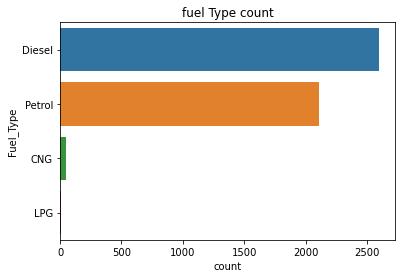

In [882]:
# barchart of fuel type
sns.countplot(y = "Fuel_Type", data = df_1, order = df_1["Fuel_Type"].value_counts().index).set(
    title="fuel Type count")

[Text(0.5, 1.0, 'location count')]

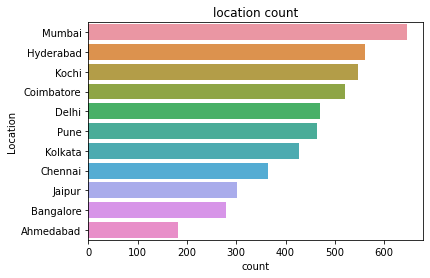

In [883]:
# barchart of location 
sns.countplot(y = "Location", data = df_1, order = df_1["Location"].value_counts().index).set(
    title="location count")

[Text(0.5, 1.0, 'Owner type count')]

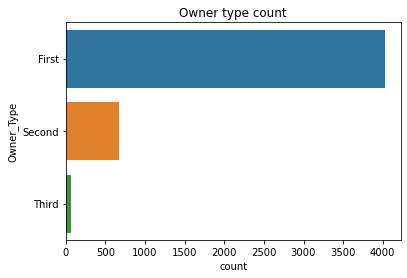

In [884]:

sns.countplot(y = "Owner_Type", data = df_1, order = df_1["Owner_Type"].value_counts().index).set(
    title="Owner type count")

In [885]:
df_3 = df_1.copy()

In [886]:
# dropping LPG, CNG, Third, Fourth and Above since there is very less data points on them.
df_3 = df_3.drop(df_3[df_3['Fuel_Type'] == 'CNG'].index)
df_3 = df_3.drop(df_3[df_3['Fuel_Type'] == 'LPG'].index)
df_3 = df_3.drop(df_3[df_3['Owner_Type'] == 'Third'].index)
df_3 = df_3.drop(df_3[df_3['Owner_Type'] == 'Fourth & Above'].index)
df_3.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,fuel_economy,engine_num,power_num,new_price_num,Price_log,car_category
1,Pune,2015,41.000,Diesel,Manual,First,5.0,15060.240964,19.67,1582.0,126.20,16.06,9.619814,Mid-Range
2,Chennai,2011,46.000,Petrol,Manual,First,5.0,5421.686747,18.20,1199.0,88.70,8.61,8.598162,Affordable
3,Chennai,2012,87.000,Diesel,Manual,First,7.0,7228.915663,20.77,1248.0,88.76,11.27,8.885844,Affordable
4,Coimbatore,2013,40.670,Diesel,Automatic,Second,5.0,21373.493976,15.20,1968.0,140.80,53.14,9.969907,Ultra_luxury
6,Jaipur,2013,86.999,Diesel,Manual,First,5.0,4216.867470,23.08,1461.0,63.10,9.47,8.346848,Affordable


In [887]:
ind_vars = df_3.drop(["Price", "Price_log"], axis = 1)
dep_var = df_3[["Price_log", "Price"]]

# Dummy encoding
ind_vars_num = encode(ind_vars)

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(ind_vars_num, dep_var, test_size = 0.3, random_state = 1)

x_train = sm.add_constant(X_train)
x_test = sm.add_constant(X_test)

/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [888]:
col_to_drop = "engine_num"
x_train = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]
col_to_drop = "new_price_num"
x_train = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

In [889]:
# Fitting linear model on new dataset
olsmodel9 = build_ols_model(x_train)
print(olsmodel9.summary())

model_performance(olsmodel9, x_train, x_test)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1591.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:58:32   Log-Likelihood:                 109.58
No. Observations:                3251   AIC:                            -175.2
Df Residuals:                    3229   BIC:                            -41.25
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [890]:
y_pred_test_pricelog = olsmodel9.predict(x_test)   # predicting price
y_pred_test_Price = y_pred_test_pricelog.apply(math.exp) # exponentiating predicted log value
y_test_Price = y_test["Price_log"]

In [891]:
r_squared = r2_score(y_test_Price, y_pred_test_pricelog)

print("R-squared for the test dataset:", r_squared)

R-squared for the test dataset: 0.9144221173320894


In [892]:
y_pred_train_pricelog = olsmodel9.predict(x_train)
y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
y_train_Price = y_train["Price_log"]

In [893]:
r_squared = r2_score(y_train_Price, y_pred_train_pricelog)

print("R-squared for the train dataset:", r_squared)

R-squared for the train dataset: 0.9118773842367114


### Assumption 2: Linearity of variables

/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

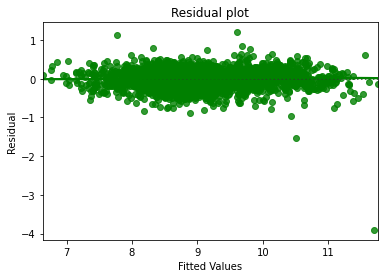

In [894]:
residuals = olsmodel6.resid
fitted_values = olsmodel6.fittedvalues
sns.residplot(fitted_values, residuals, color = "green", lowess = True)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual plot")

The relationship between Residual and fitted values is random and there is no pattern. This satisfies assumption 2

### Assumption 3: Normality

/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

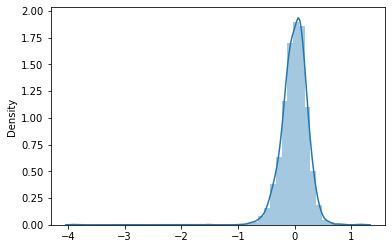

In [895]:
sns.distplot(residuals)

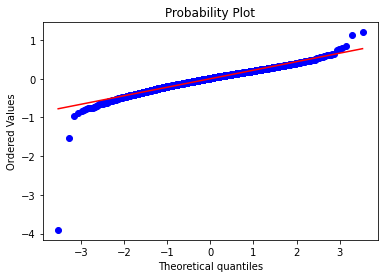

In [896]:

stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

The distribution of the residual is normal which means assumption 3 of normality is satisfied.

### Assumption 4: Mean of residual is 0 

In [897]:
np.mean(residuals)

4.570623690229951e-13

The mean of residual is almost 0 so assumption 4 is satisfied

### Taking a look at 80/20 train/test

In [898]:
ind_vars = df_1.drop(["Price", "Price_log"], axis = 1)
dep_var = df_1[["Price_log", "Price"]]

# Dummy encoding
ind_vars_num = encode(ind_vars)

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(ind_vars_num, dep_var, test_size = 0.2, random_state = 1)

x_train = sm.add_constant(X_train)
x_test = sm.add_constant(X_test)



/Users/muhammadraees/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [899]:
col_to_drop = "engine_num"
x_train = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]
col_to_drop = "new_price_num"
x_train = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

In [900]:
# Fitting linear model on new dataset
olsmodel7 = build_ols_model(x_train)
print(olsmodel7.summary())
model_performance(olsmodel7, x_train, x_test)

                            OLS Regression Results                            
Dep. Variable:              Price_log   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1691.
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        01:58:36   Log-Likelihood:                 122.85
No. Observations:                3811   AIC:                            -195.7
Df Residuals:                    3786   BIC:                            -39.56
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [901]:
y_pred_test_pricelog = olsmodel7.predict(x_test) # predicting price
y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)  # exponentiating predicted log value
y_test_Price = y_test["Price_log"]


In [902]:
from sklearn.metrics import r2_score

# y_test contains the actual target values in the test dataset
# y_pred contains the predicted values from your model

# Calculating R-squared for the test dataset
r_squared = r2_score(y_test_Price, y_pred_test_pricelog)

print("R-squared for the test dataset:", r_squared)

R-squared for the test dataset: 0.9097677953749574


In [903]:
from sklearn.metrics import r2_score

# y_test contains the actual target values in the test dataset
# y_pred contains the predicted values from your model

# Calculating R-squared for the test dataset
r_squared = r2_score(y_train_Price, y_pred_train_pricelog)

print("R-squared for the train dataset:", r_squared)

R-squared for the train dataset: 0.9118773842367114
